In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import urllib.request
from PIL import Image


In [157]:
train = pd.read_csv("C:/Users/javier.sdiaz/Desktop\BootCamp/DS102024/3-MachineLearning/EDA_2/train.csv")

## 1. INSPECCIÓN INICIAL

In [158]:
# Resumen del DataFrame

print("Dimensiones del DataFrame:", train.shape)
print("\nInformación del DataFrame:")
print(train.info())

Dimensiones del DataFrame: (912, 13)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB
None


In [159]:
# Resumen estadístico
print("\nEstadísticas descriptivas:")
print(train.describe(include='all'))


Estadísticas descriptivas:
          laptop_ID Company Product  TypeName      Inches   ScreenResolution  \
count    912.000000     912     912       912  912.000000                912   
unique          NaN      19     475         6         NaN                 38   
top             NaN  Lenovo  XPS 13  Notebook         NaN  Full HD 1920x1080   
freq            NaN     214      21       522         NaN                350   
mean     660.868421     NaN     NaN       NaN   14.957018                NaN   
std      382.437227     NaN     NaN       NaN    1.428753                NaN   
min        1.000000     NaN     NaN       NaN   10.100000                NaN   
25%      328.250000     NaN     NaN       NaN   14.000000                NaN   
50%      658.000000     NaN     NaN       NaN   15.600000                NaN   
75%      994.250000     NaN     NaN       NaN   15.600000                NaN   
max     1320.000000     NaN     NaN       NaN   18.400000                NaN   

           

## 2. LIMPIEZA DE DATOS

- Eliminar o imputar valores faltantes.
- Manejar valores duplicados (si los hay).
- Verificar la consistencia de los datos.

In [160]:
# Valores faltantes por columna
missing_values = train.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [161]:
# Número de filas duplicadas
duplicates = train.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")


Número de filas duplicadas: 0


In [162]:
print("\nValores únicos por columna:")
for column in train.columns:
    if not pd.api.types.is_numeric_dtype(train[column]):
        print(f"{column}: {train[column].unique()[:10]}")


Valores únicos por columna:
Company: ['Dell' 'Lenovo' 'LG' 'HP' 'Asus' 'Toshiba' 'MSI' 'Fujitsu' 'Acer'
 'Google']
Product: ['Inspiron 5567' 'IdeaPad 320-15IKBN' 'XPS 13' 'Inspiron 5579'
 'Gram 14Z970' 'ProBook 650' 'Elitebook 820' 'Rog GL753VE-DS74'
 'ProBook 440' 'IdeaPad 320-15ISK']
TypeName: ['Notebook' '2 in 1 Convertible' 'Ultrabook' 'Gaming' 'Netbook'
 'Workstation']
ScreenResolution: ['Full HD 1920x1080' 'Quad HD+ / Touchscreen 3200x1800'
 'Full HD / Touchscreen 1920x1080'
 'IPS Panel Full HD / Touchscreen 1920x1080' '1366x768'
 'IPS Panel Full HD 1920x1080' '1600x900' 'Touchscreen 1366x768'
 'IPS Panel 1366x768' '4K Ultra HD 3840x2160']
Cpu: ['Intel Core i5 7200U 2.5GHz' 'Intel Core i5 7Y54 1.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i3 6006U 2GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Pentium Quad Core N3710 1.6GHz'
 'Intel Core i3 7100U 2.4GHz' 'Intel Core i5 8250U 1.6GHz']
Ram: ['8GB' '4GB' '16GB' '6GB' '12GB

## 3. ANÁLISIS UNIVARIANTE

- Histogramas y boxplots para variables numéricas.
- Conteos y gráficas de barras para variables categóricas.

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_18284\4035071320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=column, palette='Set2')


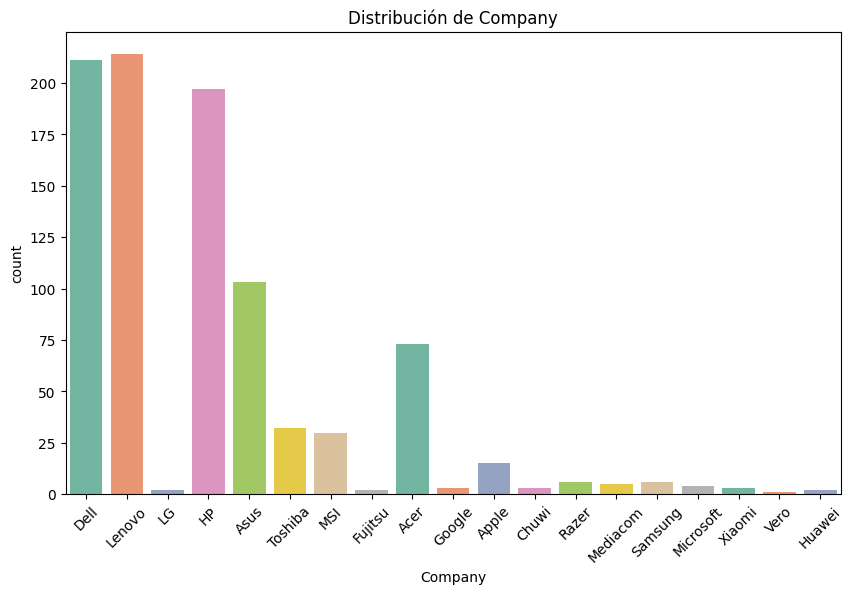

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_18284\4035071320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=column, palette='Set2')


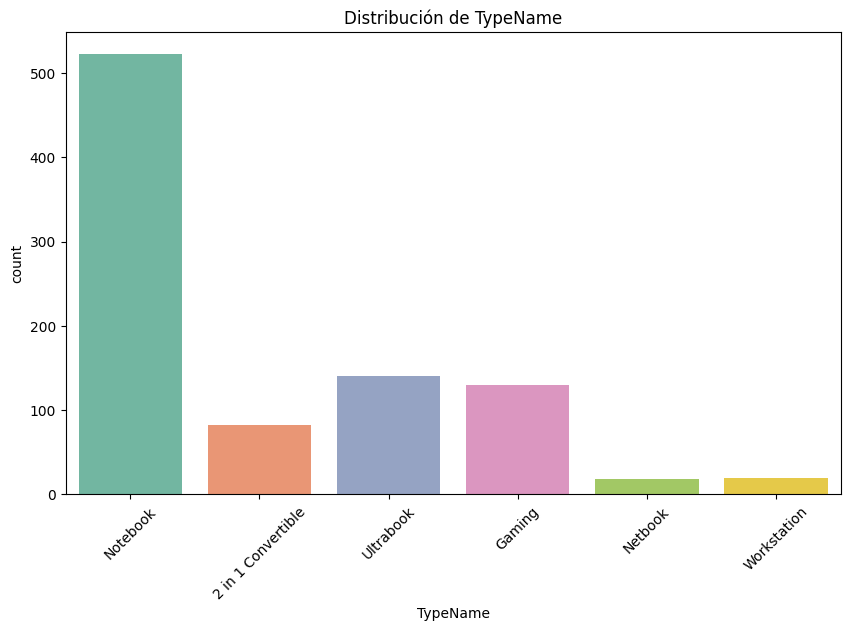

In [163]:
# Lista de variables categóricas
categorical_columns = ['Company', 'TypeName']

# Mostrar la distribución de cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=column, palette='Set2')
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()

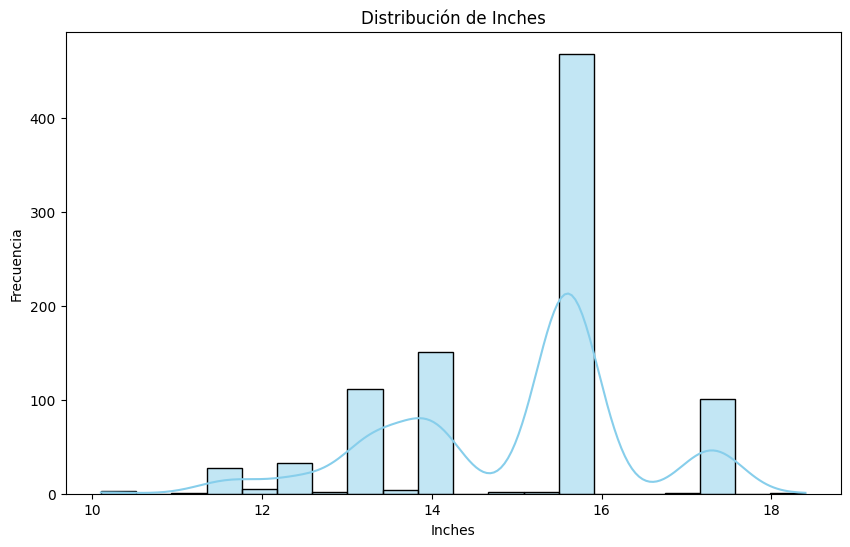

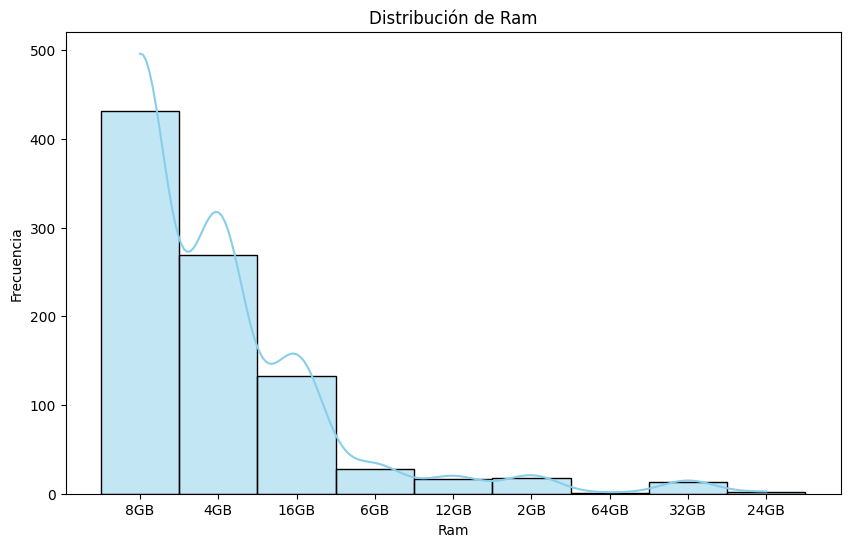

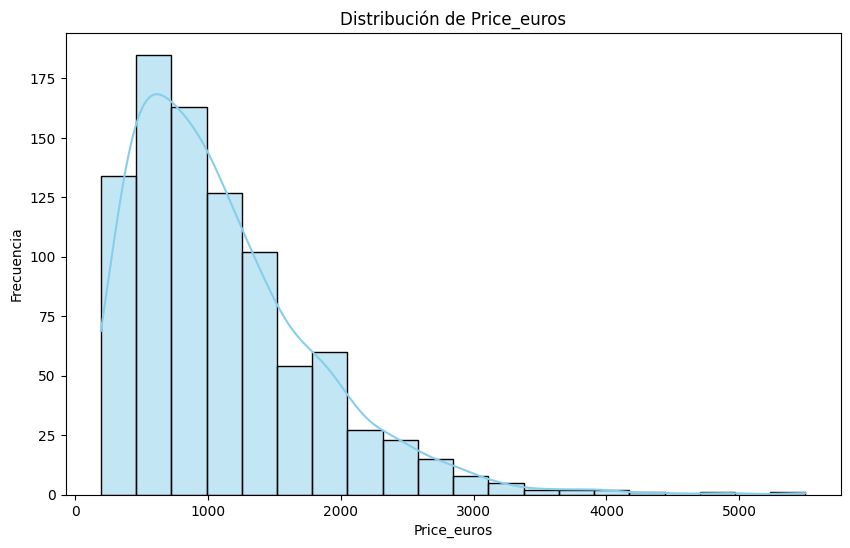

           Inches  Price_euros
count  912.000000   912.000000
mean    14.957018  1109.652752
std      1.428753   705.906280
min     10.100000   191.900000
25%     14.000000   572.750000
50%     15.600000   949.000000
75%     15.600000  1468.000000
max     18.400000  5499.000000


In [164]:
# Lista de variables numéricas
numeric_columns = ['Inches', 'Ram', 'Price_euros']

# Mostrar el histograma de cada variable numérica
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Estadísticas descriptivas de las variables numéricas
print(train[numeric_columns].describe())

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_18284\3060855162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Company', y='Price_euros', palette='Set2')


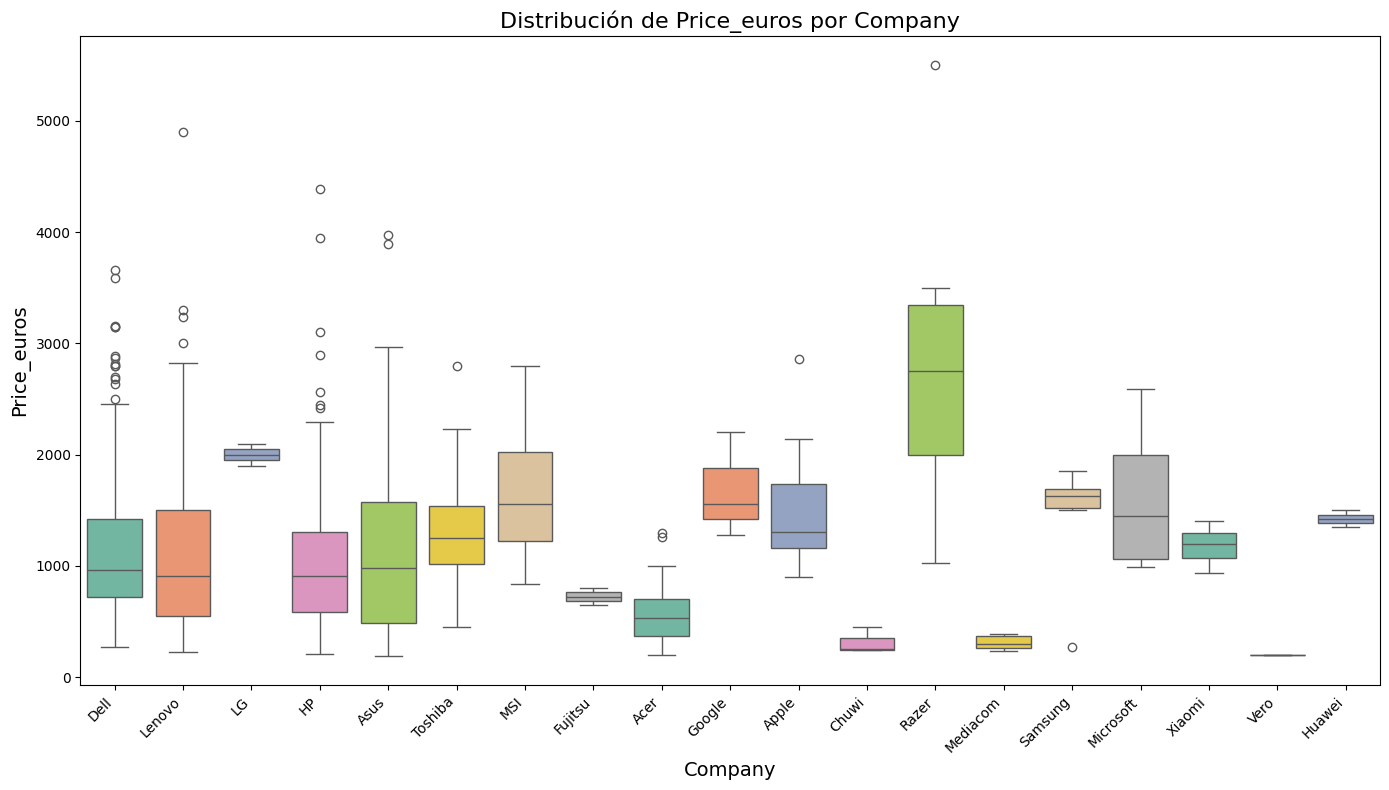

In [165]:
plt.figure(figsize=(14, 8))

# Crear el boxplot
sns.boxplot(data=train, x='Company', y='Price_euros', palette='Set2')

# Personalización del gráfico
plt.title('Distribución de Price_euros por Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Price_euros', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## 4. ANÁLISIS BIVARIANTE

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_18284\356562409.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Company', y='Price_euros', estimator='mean', ci=None, palette='Set3')
C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_18284\356562409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='Company', y='Price_euros', estimator='mean', ci=None, palette='Set3')


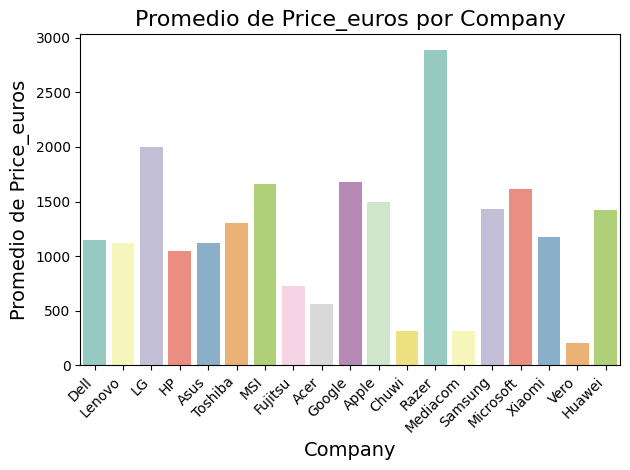

In [166]:
sns.barplot(data=train, x='Company', y='Price_euros', estimator='mean', ci=None, palette='Set3')

# Personalización del gráfico
plt.title('Promedio de Price_euros por Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Promedio de Price_euros', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

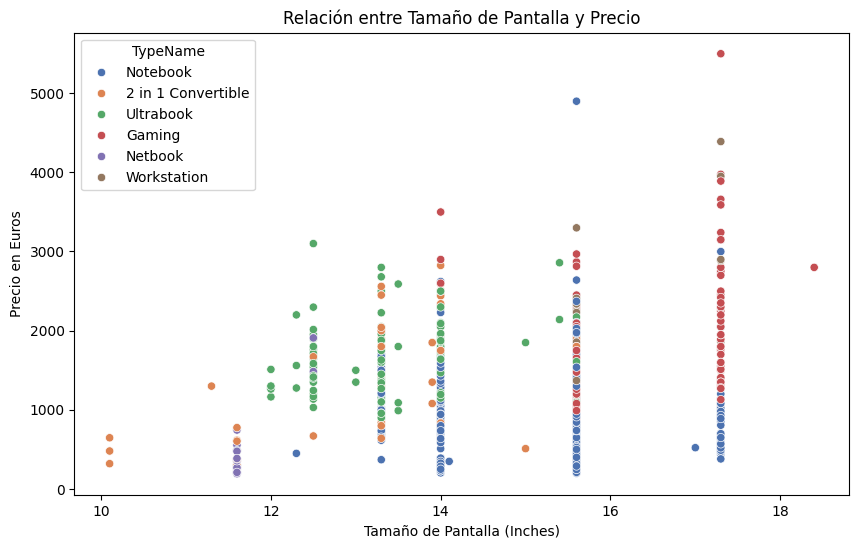

In [167]:
# Relación entre "Inches" y "Precio"
plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x='Inches', y='Price_euros', hue='TypeName', palette='deep')
plt.title('Relación entre Tamaño de Pantalla y Precio')
plt.xlabel('Tamaño de Pantalla (Inches)')
plt.ylabel('Precio en Euros')
plt.show()

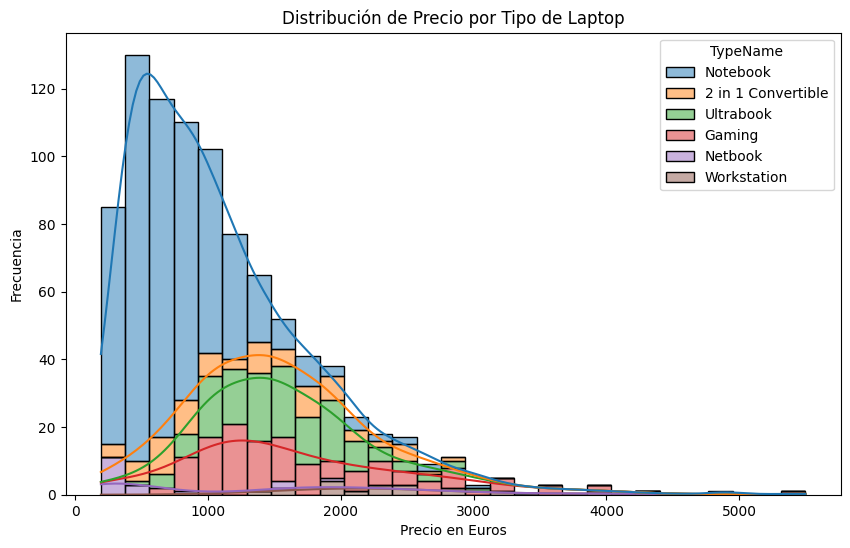

In [168]:
# Distribución de "Precio" por "Tipo de Laptop"
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Price_euros', hue='TypeName', kde=True, multiple='stack')
plt.title('Distribución de Precio por Tipo de Laptop')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_18284\3608904548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='TypeName', y='Price_euros', palette='Blues')


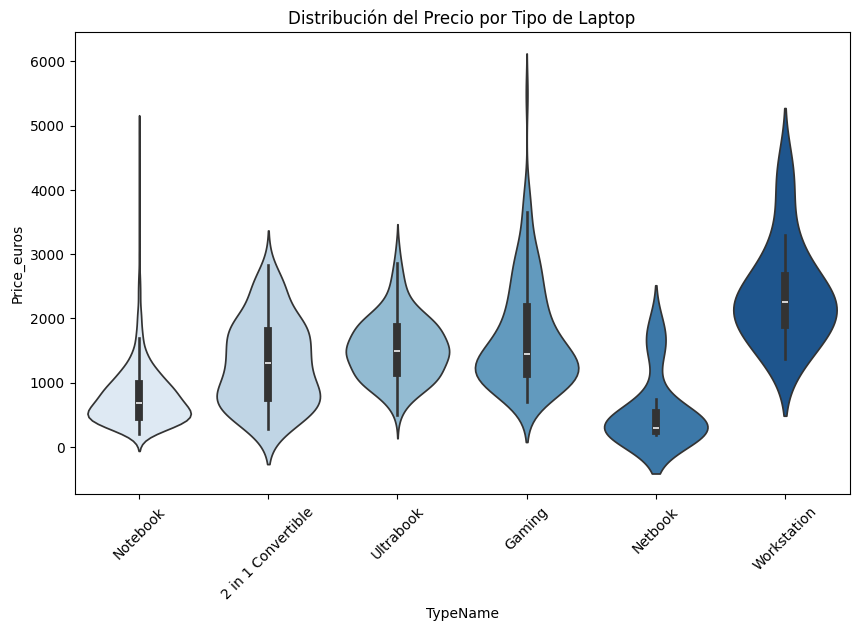

In [169]:
# Relación entre "TypeName" y "Precio" con un Violinplot
plt.figure(figsize=(10,6))
sns.violinplot(data=train, x='TypeName', y='Price_euros', palette='Blues')
plt.title('Distribución del Precio por Tipo de Laptop')
plt.xticks(rotation=45)
plt.show()

## 5. FEATURE ENGINEERING

- Crear nuevas columnas.
- Codificar variables categóricas.
- Normalizar variables numéricas.

In [170]:
train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.0
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.0
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.0
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.0


In [171]:
print(train['ScreenResolution'].unique())

['Full HD 1920x1080' 'Quad HD+ / Touchscreen 3200x1800'
 'Full HD / Touchscreen 1920x1080'
 'IPS Panel Full HD / Touchscreen 1920x1080' '1366x768'
 'IPS Panel Full HD 1920x1080' '1600x900' 'Touchscreen 1366x768'
 'IPS Panel 1366x768' '4K Ultra HD 3840x2160'
 'Touchscreen / Full HD 1920x1080' 'IPS Panel Touchscreen 2560x1440'
 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160' 'IPS Panel 2560x1440'
 '4K Ultra HD / Touchscreen 3840x2160' 'Touchscreen 2400x1600'
 'IPS Panel Retina Display 2880x1800'
 'Touchscreen / 4K Ultra HD 3840x2160' 'IPS Panel 4K Ultra HD 3840x2160'
 'Touchscreen / Quad HD+ 3200x1800' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Retina Display 2560x1600' 'Touchscreen 2256x1504'
 'IPS Panel Touchscreen 1920x1200' '1920x1080'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800' 'Touchscreen 2560x1440'
 '1440x900' 'IPS Panel Quad HD+ 3200x1800' 'IPS Panel Full HD 2560x1440'
 'Quad HD+ 3200x1800' 'IPS Panel Retina Display 2736x1824'
 'IPS Panel 

In [172]:
import re

def separate_screen_resolution(resolution_str):
    # Extract resolution
    resolution_match = re.search(r'(\d+)\s*x\s*(\d+)', str(resolution_str))
    resolution = f"{resolution_match.group(1)}x{resolution_match.group(2)}" if resolution_match else None
    
    # Extract screen type
    screen_types = ['Touchscreen', 'IPS Panel', 'Full HD', 'Quad HD+', '4K Ultra HD', 'Retina Display']
    found_types = [type for type in screen_types if type.lower() in resolution_str.lower()]
    screen_type = ' / '.join(found_types) if found_types else None
    
    return screen_type, resolution

# Apply the function
train[['ScreenType', 'Resolution']] = train['ScreenResolution'].apply(separate_screen_resolution).apply(pd.Series)

In [173]:
# Crear una nueva columna 'IsTouchscreen' con True si contiene 'Touchscreen' y False si no
train['IsTouchscreen'] = train['ScreenType'].str.contains('Touchscreen', case=False, na=False)


In [174]:
train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution,IsTouchscreen
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.0,Full HD,1920x1080,False
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.0,Full HD,1920x1080,False
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0,Touchscreen / Quad HD+,3200x1800,True
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.0,Touchscreen / Full HD,1920x1080,True
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.0,Touchscreen / IPS Panel / Full HD,1920x1080,True


In [175]:
train['Cpu'].unique()

array(['Intel Core i5 7200U 2.5GHz', 'Intel Core i5 7Y54 1.2GHz',
       'Intel Core i7 8550U 1.8GHz', 'Intel Core i7 7500U 2.7GHz',
       'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i3 7130U 2.7GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 8250U 1.6GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i5 7300HQ 2.5GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'AMD A6-Series 9220 2.5GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Celeron Dual Core N3060 1.60GHz',
       'Intel Core i5 7440HQ 2.8GHz', 'Intel Core i5 6300HQ 2.3GHz',
       'Intel Celeron Dual Core N3350 2.0GHz',
       'Intel Core i7 7600U 2.8GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 6006U 2.0GHz', 'Intel Core i7 6600U 2.6GHz',
       'Intel Core i5 7300U 2.6GHz', 'Intel Core M M3-6Y30 0.9GHz',
       'Intel Core i3 6006U 2.2GHz', 'Intel Core

In [176]:
# Separar el tipo de CPU y la memoria (en GHz)
train[['Cpu_Type', 'Memory_Cpu']] = train['Cpu'].str.extract(r'^(.*)\s(\d+\.?\d*GHz)$')

train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution,IsTouchscreen,Cpu_Type,Memory_Cpu
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0,Touchscreen / Quad HD+,3200x1800,True,Intel Core i5 7Y54,1.2GHz
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.0,Touchscreen / Full HD,1920x1080,True,Intel Core i7 8550U,1.8GHz
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.0,Touchscreen / IPS Panel / Full HD,1920x1080,True,Intel Core i7 7500U,2.7GHz


In [177]:
# Función para limpiar los valores y normalizarlos
def clean_and_normalize_memory(value):
    # Asegurarnos de que el valor es un string
    value = str(value).lower().strip()
    
    # Usar una expresión regular para capturar el número y la unidad opcional
    match = re.match(r'(\d+(\.\d+)?)(\s*(gb|mb|tb)?)?', value)
    
    if match:
        # Extraer el número y la unidad
        number = float(match.group(1))  # Captura el número
        unit = match.group(3).strip() if match.group(3) else ''  # Captura la unidad (puede estar vacía)
        
        # Convertir todo a GB
        if 'gb' in unit or unit == '':
            return number  # Ya está en GB o es solo un número
        elif 'mb' in unit:
            return number / 1024  # Convertir de MB a GB
        elif 'tb' in unit:
            return number * 1024  # Convertir de TB a GB
    return None  # Si no es válido, devolver None

# Aplicar la función a la columna Memory
train['Memory'] = train['Memory'].apply(clean_and_normalize_memory)

In [178]:
train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution,IsTouchscreen,Cpu_Type,Memory_Cpu
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256.0,AMD Radeon R7 M445,Windows 10,2.36kg,889.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2048.0,Intel HD Graphics 620,No OS,2.2kg,519.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256.0,Intel HD Graphics 615,Windows 10,1.24kg,1813.0,Touchscreen / Quad HD+,3200x1800,True,Intel Core i5 7Y54,1.2GHz
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256.0,Intel UHD Graphics 620,Windows 10,1.56kg,1049.0,Touchscreen / Full HD,1920x1080,True,Intel Core i7 8550U,1.8GHz
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512.0,Intel HD Graphics 620,Windows 10,0.98kg,1899.0,Touchscreen / IPS Panel / Full HD,1920x1080,True,Intel Core i7 7500U,2.7GHz


In [179]:
train['OpSys'].unique()

array(['Windows 10', 'No OS', 'Chrome OS', 'Linux', 'Windows 7',
       'Mac OS X', 'macOS', 'Windows 10 S', 'Android'], dtype=object)

In [180]:
train[['OpsysType', 'Version']] = train['OpSys'].str.extract(r'^(Windows|Chrome OS|Linux|No OS|Mac OS X|macOS|Android)(?:\s+(.*))?$')

train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,Resolution,IsTouchscreen,Cpu_Type,Memory_Cpu,OpsysType,Version
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256.0,AMD Radeon R7 M445,Windows 10,2.36kg,889.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz,Windows,10
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2048.0,Intel HD Graphics 620,No OS,2.2kg,519.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz,No OS,NaN
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256.0,Intel HD Graphics 615,Windows 10,1.24kg,1813.0,Touchscreen / Quad HD+,3200x1800,True,Intel Core i5 7Y54,1.2GHz,Windows,10
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256.0,Intel UHD Graphics 620,Windows 10,1.56kg,1049.0,Touchscreen / Full HD,1920x1080,True,Intel Core i7 8550U,1.8GHz,Windows,10
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512.0,Intel HD Graphics 620,Windows 10,0.98kg,1899.0,Touchscreen / IPS Panel / Full HD,1920x1080,True,Intel Core i7 7500U,2.7GHz,Windows,10


In [181]:
train['Gpu'].unique()


array(['AMD Radeon R7 M445', 'Intel HD Graphics 620',
       'Intel HD Graphics 615', 'Intel UHD Graphics 620',
       'Nvidia GeForce GTX 1050 Ti', 'Nvidia GeForce 920MX ',
       'Nvidia GeForce 920MX', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050',
       'Intel HD Graphics 520', 'AMD Radeon R5 M330',
       'Nvidia GeForce 930MX', 'Intel HD Graphics 400', 'AMD Radeon R4',
       'AMD Radeon 520', 'Nvidia GeForce GTX 1070',
       'Nvidia GeForce GTX 1050M', 'Nvidia Quadro M1200',
       'Nvidia GeForce GTX 950M', 'Nvidia GeForce 150MX',
       'Intel HD Graphics 500', 'AMD Radeon R5 M430', 'AMD Radeon R5 520',
       'Intel HD Graphics 515', 'Nvidia GeForce GTX 965M',
       'AMD Radeon 530', 'Nvidia GeForce GT 940MX',
       'Nvidia GeForce GTX 940MX', 'Intel HD Graphics',
       'AMD Radeon RX 540', 'AMD Radeon R5', 'Nvidia GeForce GTX 960M',
       'Nvidia GeForce 920', 'Nvidia GeForce GTX 980 ',
       'Intel HD Graphics 505', 'AMD Radeon R

In [182]:
train[['Manufacturer', 'MemoryGraphic']] = train['Gpu'].str.extract(r'^(Intel|AMD|Nvidia|ARM)\s+([\w\s]+)')

train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Price_euros,ScreenType,Resolution,IsTouchscreen,Cpu_Type,Memory_Cpu,OpsysType,Version,Manufacturer,MemoryGraphic
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256.0,AMD Radeon R7 M445,...,889.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz,Windows,10,AMD,Radeon R7 M445
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2048.0,Intel HD Graphics 620,...,519.0,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz,No OS,NaN,Intel,HD Graphics 620
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256.0,Intel HD Graphics 615,...,1813.0,Touchscreen / Quad HD+,3200x1800,True,Intel Core i5 7Y54,1.2GHz,Windows,10,Intel,HD Graphics 615
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256.0,Intel UHD Graphics 620,...,1049.0,Touchscreen / Full HD,1920x1080,True,Intel Core i7 8550U,1.8GHz,Windows,10,Intel,UHD Graphics 620
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512.0,Intel HD Graphics 620,...,1899.0,Touchscreen / IPS Panel / Full HD,1920x1080,True,Intel Core i7 7500U,2.7GHz,Windows,10,Intel,HD Graphics 620


In [183]:
train['Product'].unique()

array(['Inspiron 5567', 'IdeaPad 320-15IKBN', 'XPS 13', 'Inspiron 5579',
       'Gram 14Z970', 'ProBook 650', 'Elitebook 820', 'Rog GL753VE-DS74',
       'ProBook 440', 'IdeaPad 320-15ISK', 'Satellite Pro',
       'V330-15IKB (i3-7130U/4GB/128GB/FHD/W10)',
       'X751SV-TY001T (N3710/4GB/1TB/GeForce', 'ProBook 450',
       '15-bs190od (i5-8250U/4GB/1TB/W10)', 'GP72M 7REX', 'Probook 440',
       'FX502VM-AS73 (i7-7700HQ/16GB/1TB', 'IdeaPad 320-15IKB',
       'Alienware 17', 'GP62M 7RDX', 'GP62 7RDX',
       'V110-15ISK (i5-6200U/4GB/128GB/W10)', 'Thinkpad E470',
       'IdeaPad 320s-14IKB', 'X705UV-BX074T (i3-6006U/4GB/1TB/GeForce',
       '15-AC110nv (i7-6500U/6GB/1TB/Radeon', 'Inspiron 5379',
       'ProBook 470', 'UX410UA-GV097T (i3-7100U/4GB/256GB/FHD/W10)',
       'Tecra A50-D-11D', '15-bs018nq (i3-6006U/4GB/500GB/FHD/No',
       'ROG Strix', 'Latitude 3580', 'LifeBook A557', 'Latitude 5480',
       'Chromebook C731-C78G', 'GS63VR 7RF', '250 G4', 'Rog Strix',
       '15-bw011nv (A

In [184]:
train['Model Base'] = train['Product'].str.extract(r'^([^(/]+)')  # Extrae el texto antes de un paréntesis o diagonal
train['Specifications'] = train['Product'].str.extract(r'\((.*)\)|/(.*)').bfill(axis=1)[0]  # Extrae el contenido entre paréntesis o después de una diagonal

train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Resolution,IsTouchscreen,Cpu_Type,Memory_Cpu,OpsysType,Version,Manufacturer,MemoryGraphic,Model Base,Specifications
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256.0,AMD Radeon R7 M445,...,1920x1080,False,Intel Core i5 7200U,2.5GHz,Windows,10,AMD,Radeon R7 M445,Inspiron 5567,NaN
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2048.0,Intel HD Graphics 620,...,1920x1080,False,Intel Core i5 7200U,2.5GHz,No OS,NaN,Intel,HD Graphics 620,IdeaPad 320-15IKBN,NaN
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256.0,Intel HD Graphics 615,...,3200x1800,True,Intel Core i5 7Y54,1.2GHz,Windows,10,Intel,HD Graphics 615,XPS 13,NaN
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256.0,Intel UHD Graphics 620,...,1920x1080,True,Intel Core i7 8550U,1.8GHz,Windows,10,Intel,UHD Graphics 620,Inspiron 5579,NaN
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512.0,Intel HD Graphics 620,...,1920x1080,True,Intel Core i7 7500U,2.7GHz,Windows,10,Intel,HD Graphics 620,Gram 14Z970,NaN


In [185]:
train['Ram'] = train['Ram'].astype(str)
train['Ram'] = train['Ram'].str.replace('GB', '').astype(float)
train['Memory'] = train['Memory'].astype(str)
train['Memory'] = train['Memory'].str.replace('GHz', '').astype(float)
train['Weight']= train['Weight'].astype(str)
train['Weight'] = train['Weight'].str.replace('kg', '').astype(float)
train['Memory_Cpu']= train['Memory_Cpu'].astype(str)
train['Memory_Cpu'] = train['Memory_Cpu'].str.replace('GHz', '').astype(float)



In [186]:
train[['width', 'height']] = train['Resolution'].str.split('x', expand=True)

train['width'] = train['width'].astype(int)
train['height'] = train['height'].astype(int)

In [187]:
train.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'ScreenType', 'Resolution', 'IsTouchscreen', 'Cpu_Type',
       'Memory_Cpu', 'OpsysType', 'Version', 'Manufacturer', 'MemoryGraphic',
       'Model Base', 'Specifications', 'width', 'height'],
      dtype='object')

In [188]:
df_filtered = train.drop(columns=['ScreenResolution', 'Cpu','Gpu','OpSys','Product'])
df_filtered

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Weight,Price_euros,ScreenType,Resolution,...,Cpu_Type,Memory_Cpu,OpsysType,Version,Manufacturer,MemoryGraphic,Model Base,Specifications,width,height
0,1223,Dell,Notebook,15.6,8.0,256.0,2.36,889.00,Full HD,1920x1080,...,Intel Core i5 7200U,2.5,Windows,10,AMD,Radeon R7 M445,Inspiron 5567,NaN,1920,1080
1,78,Lenovo,Notebook,15.6,8.0,2048.0,2.20,519.00,Full HD,1920x1080,...,Intel Core i5 7200U,2.5,No OS,NaN,Intel,HD Graphics 620,IdeaPad 320-15IKBN,NaN,1920,1080
2,1267,Dell,2 in 1 Convertible,13.3,8.0,256.0,1.24,1813.00,Touchscreen / Quad HD+,3200x1800,...,Intel Core i5 7Y54,1.2,Windows,10,Intel,HD Graphics 615,XPS 13,NaN,3200,1800
3,161,Dell,2 in 1 Convertible,15.6,8.0,256.0,1.56,1049.00,Touchscreen / Full HD,1920x1080,...,Intel Core i7 8550U,1.8,Windows,10,Intel,UHD Graphics 620,Inspiron 5579,NaN,1920,1080
4,922,LG,Ultrabook,14.0,8.0,512.0,0.98,1899.00,Touchscreen / IPS Panel / Full HD,1920x1080,...,Intel Core i7 7500U,2.7,Windows,10,Intel,HD Graphics 620,Gram 14Z970,NaN,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,Notebook,15.6,4.0,256.0,2.20,399.00,Full HD,1920x1080,...,AMD A9-Series 9420,2.9,Windows,10,AMD,Radeon 530,IdeaPad 320-15AST,NaN,1920,1080
908,947,Lenovo,2 in 1 Convertible,13.3,16.0,1024.0,1.30,1799.00,Touchscreen / IPS Panel / Quad HD+,3200x1800,...,Intel Core i7 6560U,2.2,Windows,10,Intel,Iris Graphics 540,Yoga 900-13ISK,NaN,3200,1800
909,590,Dell,Notebook,15.6,16.0,256.0,1.93,1537.39,Full HD,1920x1080,...,Intel Core i7 7600U,2.8,Windows,10,Nvidia,GeForce 930MX,Latitude 5580,NaN,1920,1080
910,1143,Lenovo,Gaming,15.6,8.0,128.0,2.40,989.00,IPS Panel / Full HD,1920x1080,...,Intel Core i5 7300HQ,2.5,No OS,NaN,Nvidia,GeForce GTX 1060,Legion Y520-15IKBN,NaN,1920,1080


In [189]:
# Convertir la columna 'laptop_ID' a índice
df = train.set_index('laptop_ID')

In [190]:
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Cpu_Type,Memory_Cpu,OpsysType,Version,Manufacturer,MemoryGraphic,Model Base,Specifications,width,height
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256.0,AMD Radeon R7 M445,Windows 10,...,Intel Core i5 7200U,2.5,Windows,10,AMD,Radeon R7 M445,Inspiron 5567,NaN,1920,1080
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,2048.0,Intel HD Graphics 620,No OS,...,Intel Core i5 7200U,2.5,No OS,NaN,Intel,HD Graphics 620,IdeaPad 320-15IKBN,NaN,1920,1080
1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8.0,256.0,Intel HD Graphics 615,Windows 10,...,Intel Core i5 7Y54,1.2,Windows,10,Intel,HD Graphics 615,XPS 13,NaN,3200,1800
161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256.0,Intel UHD Graphics 620,Windows 10,...,Intel Core i7 8550U,1.8,Windows,10,Intel,UHD Graphics 620,Inspiron 5579,NaN,1920,1080
922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8.0,512.0,Intel HD Graphics 620,Windows 10,...,Intel Core i7 7500U,2.7,Windows,10,Intel,HD Graphics 620,Gram 14Z970,NaN,1920,1080


In [191]:
df['Manufacturer'].unique()

array(['AMD', 'Intel', 'Nvidia'], dtype=object)

In [192]:
# pasar la columna Manufacturer a numerica
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Manufacturer'] = encoder.fit_transform(df['Manufacturer'])


In [193]:
df['OpsysType'].unique()

array(['Windows', 'No OS', 'Chrome OS', 'Linux', 'Mac OS X', 'macOS',
       'Android'], dtype=object)

In [194]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['OpsysType'] = encoder.fit_transform(df['OpsysType'])

In [195]:
df['TypeName'].unique()

array(['Notebook', '2 in 1 Convertible', 'Ultrabook', 'Gaming', 'Netbook',
       'Workstation'], dtype=object)

In [196]:
encoder = LabelEncoder()
df['TypeName'] = encoder.fit_transform(df['TypeName'])

In [197]:
df['Company'].unique()

array(['Dell', 'Lenovo', 'LG', 'HP', 'Asus', 'Toshiba', 'MSI', 'Fujitsu',
       'Acer', 'Google', 'Apple', 'Chuwi', 'Razer', 'Mediacom', 'Samsung',
       'Microsoft', 'Xiaomi', 'Vero', 'Huawei'], dtype=object)

In [198]:
encoder = LabelEncoder()
df['Company'] = encoder.fit_transform(df['Company'])

In [199]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'ScreenType',
       'Resolution', 'IsTouchscreen', 'Cpu_Type', 'Memory_Cpu', 'OpsysType',
       'Version', 'Manufacturer', 'MemoryGraphic', 'Model Base',
       'Specifications', 'width', 'height'],
      dtype='object')

In [200]:
df = df.drop(columns=['Product','ScreenResolution','Cpu','OpSys','Cpu_Type','MemoryGraphic','Model Base','Specifications','ScreenType','Resolution','Version','Gpu','width','height'])

In [151]:
df['IsTouchscreen'] = df['IsTouchscreen'].map({True: 1, False: 0})

In [201]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Price_euros,IsTouchscreen,Memory_Cpu,OpsysType,Manufacturer
laptop_ID,,,,,,,,,,,
1223,4,3,15.6,8.0,256.0,2.36,889.0,False,2.5,5,0
78,10,3,15.6,8.0,2048.0,2.20,519.0,False,2.5,4,1
1267,4,0,13.3,8.0,256.0,1.24,1813.0,True,1.2,5,1
161,4,0,15.6,8.0,256.0,1.56,1049.0,True,1.8,5,1
922,9,4,14.0,8.0,512.0,0.98,1899.0,True,2.7,5,1


In [202]:
df.to_csv('train_normalizado.csv', index=False, sep=';', encoding='utf-8')

## 6. HIPÓTESIS

1. Hipótesis sobre la relación entre "Tipo de Laptop" y "Precio":
Hipótesis: Las laptops de tipo "Gaming" tienen un precio más alto que las laptops de tipo "Notebook" o "Convertible".

Justificación: Las laptops Gaming suelen tener componentes de mayor rendimiento (procesadores más potentes, tarjetas gráficas dedicadas, etc.), lo que podría justificar un precio más elevado en comparación con laptops más sencillas.
2. Hipótesis sobre la relación entre "Cpu" y "Precio":
Hipótesis: Las laptops con procesadores de gama alta (por ejemplo, Intel i7, AMD Ryzen 7) son más caras que las que tienen procesadores de gama baja (por ejemplo, Intel i3, i5).

Justificación: Los procesadores más potentes son componentes clave en laptops de alto rendimiento, lo que típicamente aumenta el precio del producto.
3. Hipótesis sobre la relación entre "Ram" y "Tipo de Laptop":
Hipótesis: Las laptops de tipo "Gaming" tienen una mayor cantidad de memoria RAM que las laptops de tipo "Notebook" o "Convertible".

Justificación: Las laptops para juegos requieren más memoria RAM para ejecutar juegos y aplicaciones demandantes, mientras que las laptops de uso general no necesitan tanto.
4. Hipótesis sobre la relación entre "ScreenResolution" y "Inches":
Hipótesis: Las laptops con pantallas de mayor tamaño (por ejemplo, 15 o 17 pulgadas) tienen una resolución de pantalla más alta (por ejemplo, Full HD o 4K) que las laptops de menor tamaño (por ejemplo, 13 pulgadas).

Justificación: Las laptops más grandes, al tener más espacio para mostrar detalles gráficos, tienden a tener pantallas de resolución más alta para mejorar la experiencia visual.
5. Hipótesis sobre la relación entre "Gpu" y "Precio":
Hipótesis: Las laptops con tarjetas gráficas dedicadas (GPU) tienen un precio más alto que las laptops con tarjetas gráficas integradas.

Justificación: Las tarjetas gráficas dedicadas son componentes que mejoran el rendimiento visual, especialmente para juegos y trabajos gráficos, lo que aumenta el costo del producto.
6. Hipótesis sobre la relación entre "Memory" (Capacidad de almacenamiento) y "Precio":
Hipótesis: Las laptops con mayor capacidad de almacenamiento (por ejemplo, 1 TB o más) son más caras que las laptops con menor capacidad de almacenamiento (por ejemplo, 256 GB o 512 GB).

Justificación: Las laptops con mayor capacidad de almacenamiento suelen ser más caras debido al costo de los discos duros o SSD de mayor capacidad.
7. Hipótesis sobre la relación entre "Tipo de Laptop" y "ScreenResolution":
Hipótesis: Las laptops de tipo "Gaming" o "Convertible" tienen una resolución de pantalla más alta que las laptops de tipo "Notebook".

Justificación: Las laptops Gaming necesitan resoluciones altas para ofrecer una buena experiencia de juego, mientras que las Notebooks tienden a ser más asequibles con resoluciones más bajas.
8. Hipótesis sobre la relación entre "Cpu" y "ScreenResolution":
Hipótesis: Las laptops con procesadores de gama alta (por ejemplo, Intel i7 o AMD Ryzen 7) suelen tener resoluciones de pantalla más altas (por ejemplo, 4K o Full HD) en comparación con las laptops con procesadores más sencillos (por ejemplo, Intel i3 o i5).

Justificación: Los procesadores de gama alta están diseñados para manejar tareas exigentes, lo que a menudo va acompañado de una resolución de pantalla que aprovecha la potencia de procesamiento para una mejor experiencia visual.
9. Hipótesis sobre la relación entre "Gpu" y "Ram":
Hipótesis: Las laptops con tarjetas gráficas dedicadas (GPU) tienen más memoria RAM que las laptops con tarjetas gráficas integradas.

Justificación: Las tarjetas gráficas dedicadas requieren más memoria RAM para manejar gráficos complejos, lo que generalmente se traduce en laptops con una mayor capacidad de RAM.
10. Hipótesis sobre la relación entre "Tipo de Laptop" y "Ram":
Hipótesis: Las laptops de tipo "Gaming" tienen más memoria RAM que las laptops de tipo "Convertible" o "Notebook".

Justificación: Las laptops Gaming deben soportar tareas más exigentes, como juegos, que requieren más RAM. Por otro lado, las laptops Notebook o Convertible están diseñadas para tareas más sencillas y, por lo tanto, no requieren tanta memoria.